In [77]:
import cv2

def play_video_cap(vc, window_name='frame', fps=60, processing=[]):
    frame_len = int(1000.0 / fps)
    while (vc.isOpened()):
        ret, frame = vc.read()
        if frame is None:
            break
        #processed = reduce(lambda x,f: f(x), processing, frame)
        cv2.imshow(window_name, frame)
        if cv2.waitKey(frame_len) & 0xFF == ord('q'):
            break
    cv2.destroyWindow(window_name)
    cv2.waitKey(1)

def RGB_to_grayscale(frame):
    return cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
movie_filename = '../SEP_color_test_1.avi'

cap = cv2.VideoCapture(movie_filename)
print 'Cap is opened:', cap.isOpened()
play_video_cap(cap, processing=[])
cap.release()

Cap is opened: True


In [74]:
%autoreload 2
import generative.movie as movie
import generative.util.video as vu
import cv2
import json

with open('../movies.json') as data_file:    
    struct = json.load(data_file)
    movies_path = struct['movies_path']
    l_movie_args = struct['movie_args']

i_movie = 0
movie_args = l_movie_args[i_movie]

mov = movie.MovieStream(os.path.join(movies_path,movie_args['fn']),drop_frames=movie_args['drop_frames'],
                  n_frames=0, fps=60, preprocessing=[vu.binarize_median])
mov.save('iamsaved.avi')

error: /srv/software/src/opencv-2.4.8/modules/highgui/src/cap_gstreamer.cpp:518: error: (-210) Your version of Gstreamer doesn't support this codec acutally or needed plugin missing. in function CvVideoWriter_GStreamer::open


done smoothing.
done smoothing.
done smoothing.
done smoothing.
done smoothing.
done smoothing.
done smoothing.
done smoothing.
done smoothing.
done smoothing.
done smoothing.
done smoothing.


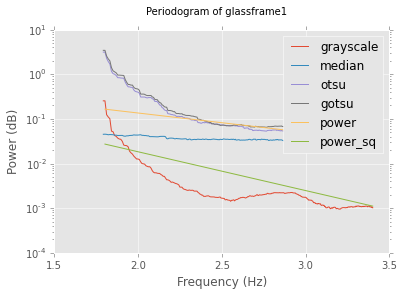

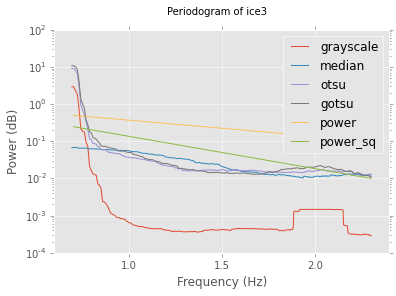

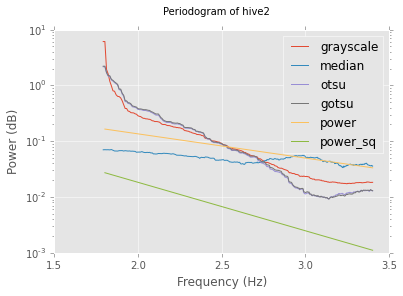

In [10]:
%matplotlib inline
%autoreload 2
from matplotlib import pyplot as plt
import generative.movie as movie
import generative.util.video as vu
import generative.util.plot as pu
import generative.util.math as mu
from scipy import signal

import json

with open('../movies.json') as data_file:    
    struct = json.load(data_file)
    movies_path = struct['movies_path']
    l_movie_args = struct['movie_args']

for movie_args in l_movie_args:
    l_thresholding_names = ['grayscale', 'median', 'otsu', 'gotsu']
    l_thresholding_funcs = [[], [vu.binarize_median], [vu.binarize_otsu], [vu.binarize_gotsu]]
    l_movies = [movie.MovieStream(os.path.join(movies_path,movie_args['fn']),drop_frames=movie_args['drop_frames'],
                        n_frames=1000,preprocessing=p) for p in l_thresholding_funcs]

    fig = pu.luminance_periodograms(l_movies, l_thresholding_names, 
                                lambda x: mu.moving_average(x,n=101))
    fig.suptitle('Periodogram of ' + movie_args['name'])
    fig.savefig('generative/'+movie_args['name']+'_periodogram.png')

In [ ]:
print l_movies[0].fps

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import generative.math_utils as mu
N=50
fig2 = plt.figure()
f, Pxx = l_movies[0].luminance_spectrum()
plt.semilogy(f,Pxx)
f, Pxx = l_movies[0].luminance_spectrum(lambda x: signal.savgol_filter(x,101,3))
plt.semilogy(f,Pxx)
f, Pxx = l_movies[0].luminance_spectrum(lambda x: mu.moving_average(x,n=N))
plt.semilogy(f[N-1:],Pxx)
plt.legend(['original','savgol','moving_avg'])